In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [255]:
data = pd.read_csv('DS_Sber.csv', sep=';')
data.columns = data.columns.str.lower()
data['reportdate'] = data['reportdate'].str.replace('.', '/')
data["reportdate"] = pd.to_datetime(data["reportdate"], infer_datetime_format=True)

data.tail()

C:\Temp\ipykernel_10800\1542489230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reportdate'] = data['reportdate'].str.replace('.', '/')


reportdate        value
2106 2019-10-06  64630140507
2107 2019-10-07  66115288637
2108 2019-10-08  68424049766
2109 2019-10-09  72492897583
2110 2019-10-10  72307860851

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reportdate  2111 non-null   datetime64[ns]
 1   value       2111 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [4]:
data.describe()

value
count  2.111000e+03
mean   3.389668e+10
std    1.875474e+10
min    3.282810e+09
25%    1.824160e+10
50%    3.021352e+10
75%    4.758339e+10
max    7.822860e+10

In [5]:
from sklearn.linear_model import LinearRegression

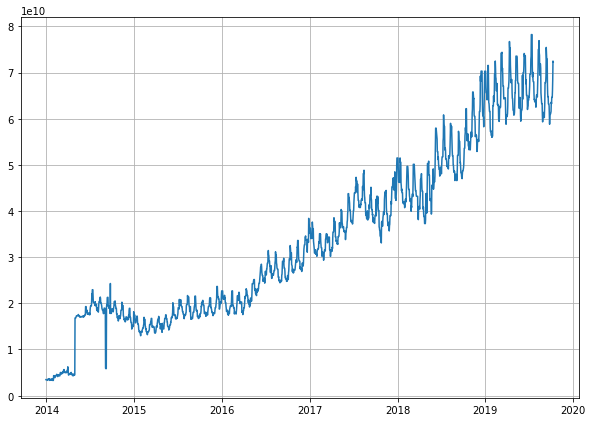

In [6]:
plt.figure(figsize=(10, 7))

plt.grid(True)
plt.plot(data.reportdate, data.value)

plt.show()

In [123]:
df = data['value'].values.reshape((-1, 1))
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [124]:
def create_dataset(df, window):
    x = []
    y = []
    for i in range(window, df.shape[0]):
        x.append(df[i-window:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return (x, y)

In [169]:
window = 30 * 3

x_train, y_train = create_dataset(dataset_train, window)
x_test, y_test = create_dataset(dataset_test, window)

x_train, y_train

(array([[ 3457625638,  3417092149,  3417092149, ...,  5286682266,
          5477757648,  5477757648],
        [ 3417092149,  3417092149,  3417092149, ...,  5477757648,
          5477757648,  5477757648],
        [ 3417092149,  3417092149,  3417092149, ...,  5477757648,
          5477757648,  6250216266],
        ...,
        [47799878668, 45375993134, 42920394102, ..., 57112428131,
         58999288196, 57402158309],
        [45375993134, 42920394102, 42265916848, ..., 58999288196,
         57402158309, 57402158309],
        [42920394102, 42265916848, 42676045013, ..., 57402158309,
         57402158309, 57402158309]], dtype=int64),
 array([ 5477757648,  6250216266,  5007552613, ..., 57402158309,
        57402158309, 58370584299], dtype=int64))

In [170]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)

accuracy

0.901516517430963

In [171]:
x_data = x_train

prediction = clf.predict(x_data)
prediction

array([5.55691052e+09, 5.50743811e+09, 6.27572364e+09, ...,
       5.79011963e+10, 5.75418613e+10, 5.71455675e+10])

In [172]:
nswr = y_train.copy()

for _ in range(window):
    x_data = nswr[-window:].reshape(1, window)
    
    prediction = clf.predict(x_data)
    
    nswr = np.append(nswr, prediction)
    

nswr[-window:]

array([5.78604026e+10, 5.68171575e+10, 5.57762015e+10, 5.46668608e+10,
       5.34136076e+10, 5.25709351e+10, 5.11773694e+10, 5.05321794e+10,
       5.04989739e+10, 5.02943405e+10, 4.98353109e+10, 4.95113684e+10,
       4.93312313e+10, 4.94483796e+10, 4.97200726e+10, 5.04028704e+10,
       5.04546671e+10, 5.03780833e+10, 5.11266229e+10, 5.13363803e+10,
       5.19041761e+10, 5.25098274e+10, 5.37554318e+10, 5.42384446e+10,
       5.49996979e+10, 5.60521552e+10, 5.67927919e+10, 5.68383379e+10,
       5.75626374e+10, 5.82733630e+10, 5.80140200e+10, 5.71158950e+10,
       5.63910083e+10, 5.57133568e+10, 5.45238403e+10, 5.36734840e+10,
       5.32755329e+10, 5.23940225e+10, 5.14352457e+10, 5.08008976e+10,
       5.02662115e+10, 4.99118813e+10, 4.99691486e+10, 5.04549593e+10,
       5.03710127e+10, 5.03344718e+10, 5.09586165e+10, 5.13173611e+10,
       5.15299919e+10, 5.18784606e+10, 5.28125903e+10, 5.31853711e+10,
       5.34752239e+10, 5.43157426e+10, 5.52961831e+10, 5.59727699e+10,
      

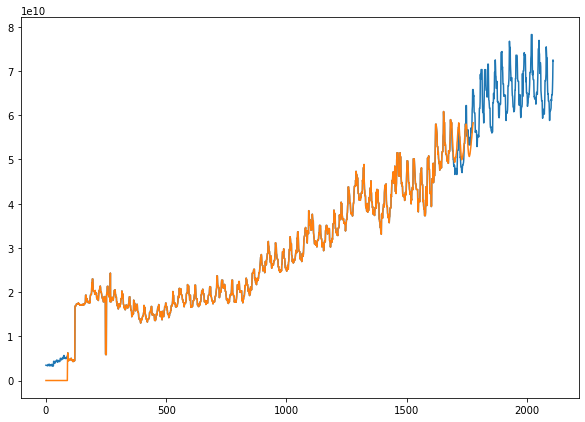

In [173]:
plt.figure(figsize=(10, 7))

plt.plot(df)
plt.plot(np.append(np.array([0] * window), nswr))

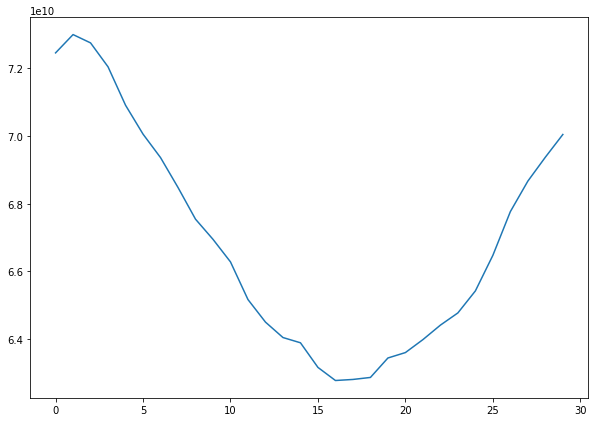

In [118]:
plt.figure(figsize=(10, 7))

plt.plot(nswr[-window:])

In [15]:
nswr[-1], df[-1]

(69526556818.49867, array([72307860851], dtype=int64))

In [194]:
df = data['value'].values.reshape((-1, 1))
dataset_train = np.array(df)

window = 30 * 12

x_train, y_train = create_dataset(dataset_train, window)

x_train, y_train

(array([[ 3457625638,  3417092149,  3417092149, ..., 14423922093,
         14593843621, 14801571032],
        [ 3417092149,  3417092149,  3417092149, ..., 14593843621,
         14801571032, 14769266649],
        [ 3417092149,  3417092149,  3417092149, ..., 14801571032,
         14769266649, 15233591723],
        ...,
        [62173977750, 62173977750, 57047798521, ..., 64630140507,
         64630140507, 66115288637],
        [62173977750, 57047798521, 56096390677, ..., 64630140507,
         66115288637, 68424049766],
        [57047798521, 56096390677, 55210498279, ..., 66115288637,
         68424049766, 72492897583]], dtype=int64),
 array([14769266649, 15233591723, 15233591723, ..., 68424049766,
        72492897583, 72307860851], dtype=int64))

In [244]:
model = LinearRegression()

In [245]:
model.fit(x_train, y_train)
accuracy = clf.score(x_train, y_train)

accuracy

0.9972750343159179

In [246]:
nswr = np.array(df[:int(df.shape[0]*0.8)])

for _ in range(window):
    x_data = nswr[-window:].reshape(1, window)
    
    prediction = model.predict(x_data)
    
    nswr = np.append(nswr, prediction)
    

nswr[-window:]

array([5.82386360e+10, 5.59150829e+10, 5.42637357e+10, 5.31288461e+10,
       5.30779706e+10, 5.25201507e+10, 5.01375808e+10, 4.94051790e+10,
       4.91586966e+10, 4.87928729e+10, 4.83046746e+10, 4.81978811e+10,
       4.78780497e+10, 4.65747652e+10, 4.79136181e+10, 4.82171760e+10,
       4.87607673e+10, 4.91085906e+10, 5.01385765e+10, 5.03257395e+10,
       5.13023532e+10, 5.13456577e+10, 5.25640385e+10, 5.34890337e+10,
       5.64737336e+10, 5.67109991e+10, 5.69759545e+10, 5.57498602e+10,
       5.69907898e+10, 5.68590175e+10, 5.63187232e+10, 5.50835856e+10,
       5.38485206e+10, 5.34670055e+10, 5.06482166e+10, 4.99013672e+10,
       5.08198458e+10, 5.07146705e+10, 4.88025571e+10, 4.84353251e+10,
       4.82101458e+10, 4.73266942e+10, 4.66801856e+10, 4.76941692e+10,
       4.86563340e+10, 4.97823942e+10, 4.94333494e+10, 4.97650846e+10,
       4.97253413e+10, 5.01717138e+10, 5.09680463e+10, 5.16553085e+10,
       5.30189024e+10, 5.39973235e+10, 5.43585662e+10, 5.54686993e+10,
      

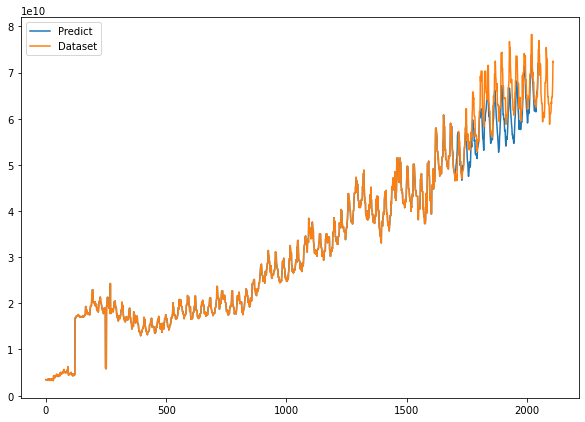

In [252]:
plt.figure(figsize=(10, 7))

plt.plot(nswr, label='Predict')
plt.plot(df, label='Dataset')

plt.legend()

plt.show()

In [203]:
a = np.datetime64('2019-02-01')

dates = np.array([]).astype('datetime64')

for i in range(window):
    a += np.timedelta64(1, 'D')
    
    dates = np.append(dates, a)
    
dates

array(['2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
       '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09',
       '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13',
       '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17',
       '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
       '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
       '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
       '2019-03-30', '2019-03-31', '2019-04-01', '2019-04-02',
       '2019-04-03', '2019-04-04', '2019-04-05', '2019-

In [204]:
total_nswr = pd.DataFrame({'dates': dates, 'values': nswr[-window:]})

total_nswr

dates        values
0   2019-02-02  7.679364e+10
1   2019-02-03  7.738268e+10
2   2019-02-04  7.597259e+10
3   2019-02-05  7.443047e+10
4   2019-02-06  7.072239e+10
..         ...           ...
355 2020-01-23  8.050997e+10
356 2020-01-24  8.206038e+10
357 2020-01-25  8.318309e+10
358 2020-01-26  8.466672e+10
359 2020-01-27  8.535033e+10

[360 rows x 2 columns]

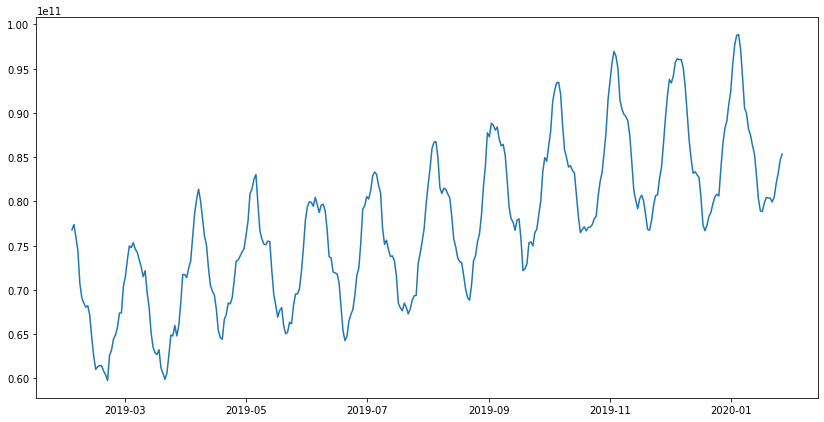

In [205]:
plt.figure(figsize=(14, 7))

plt.plot(total_nswr.dates, total_nswr['values'])

In [206]:
clf.intercept_

113996804.51243591

In [207]:
clf.coef_

array([ 5.78026930e-02, -4.87860990e-02,  1.14586960e-01, -9.99444740e-02,
       -4.42803651e-04, -9.31253797e-04, -3.32407719e-03, -2.35435918e-02,
        4.13802608e-02, -2.25325165e-02,  1.25571010e-02, -2.99175767e-02,
        4.98479991e-02,  2.02382039e-02,  5.88417773e-03, -1.52398683e-02,
       -1.74959327e-02,  1.31453574e-02, -1.39911420e-02,  2.55810239e-02,
       -1.92543661e-02,  5.69374807e-02, -7.32781686e-02, -4.61567869e-02,
        3.05449733e-02,  2.46437481e-02, -3.25217305e-03, -1.30891679e-03,
       -2.06142219e-02,  4.39620858e-02, -2.78655726e-02, -6.15507145e-03,
        6.37149333e-03, -1.10020685e-03,  1.45261396e-02, -4.17427655e-02,
       -6.24364229e-02,  9.93862289e-02,  6.68475576e-03, -1.01479026e-02,
        2.75339710e-03, -1.14981527e-02, -6.14932044e-02,  4.08037482e-02,
        2.14673953e-02, -7.12307806e-03,  1.24124508e-02,  7.16209634e-03,
        7.57120758e-05, -6.97059524e-02,  2.80473388e-02, -2.49204498e-02,
        1.66019249e-02, -

In [209]:
ind = data[data['reportdate'] == np.datetime64('2019-02-01')].index

test = data[:ind[0]+1]

test

reportdate        value
0    2013-12-30   3457625638
1    2013-12-31   3417092149
2    2014-01-01   3417092149
3    2014-01-02   3417092149
4    2014-01-03   3417092149
...         ...          ...
1855 2019-01-28  55965199247
1856 2019-01-29  56560432978
1857 2019-01-30  56138073838
1858 2019-01-31  56400367406
1859 2019-02-01  62824351872

[1860 rows x 2 columns]

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
df = data['value'].values.reshape((-1, 1))
dataset_train = np.array(df)

window = 30 * 12

x_train, y_train = create_dataset(dataset_train, window)
x_test, y_test = create_dataset(dataset_test, window)

model = RandomForestRegressor()

model.fit(x_train, y_train)
accuracy = model.score(x_train, y_train)

accuracy

0.9993829076468643

In [192]:
nswr = df.copy()

for _ in range(window):
    x_data = nswr[-window:].reshape(1, window)
    
    prediction = model.predict(x_data)
    
    nswr = np.append(nswr, prediction)
    
nswr[-window:]

array([7.32453223e+10, 7.33057235e+10, 7.32663646e+10, 7.31299574e+10,
       7.17787131e+10, 7.12102787e+10, 7.02447101e+10, 6.98225131e+10,
       6.95987101e+10, 6.90500001e+10, 6.79507271e+10, 6.67712816e+10,
       6.61708437e+10, 6.60249314e+10, 6.56789877e+10, 6.50504730e+10,
       6.30295211e+10, 6.30196668e+10, 6.31283269e+10, 6.33627776e+10,
       6.36979878e+10, 6.38293961e+10, 6.37932599e+10, 6.42935350e+10,
       6.48155768e+10, 6.58783284e+10, 6.86574632e+10, 7.04178483e+10,
       7.13184454e+10, 7.19936495e+10, 7.36876052e+10, 7.40127301e+10,
       7.31520175e+10, 7.28928794e+10, 7.27500157e+10, 7.25642978e+10,
       7.14935336e+10, 7.06484494e+10, 6.96179260e+10, 6.89396333e+10,
       6.83613484e+10, 6.79512611e+10, 6.68735790e+10, 6.64927538e+10,
       6.63001065e+10, 6.61061614e+10, 6.62643057e+10, 6.66351112e+10,
       6.70876565e+10, 6.73610691e+10, 6.76099813e+10, 6.75129158e+10,
       6.76911950e+10, 6.80706349e+10, 6.82929579e+10, 6.89546158e+10,
      

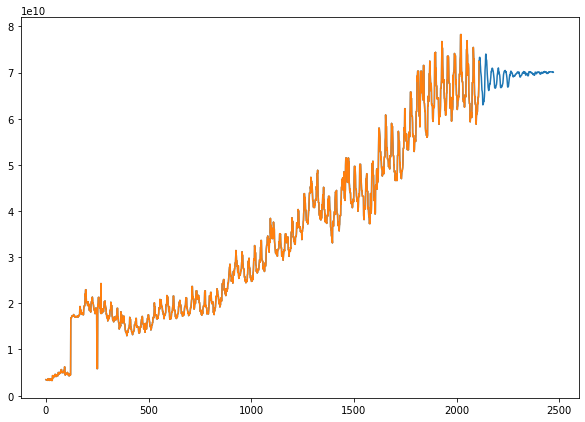

In [193]:
plt.figure(figsize=(10, 7))

plt.plot(nswr)
plt.plot(df)

In [237]:
data['predict'] = data['value'].shift(-window)

data

reportdate        value       predict
0    2013-12-30   3457625638  1.476927e+10
1    2013-12-31   3417092149  1.523359e+10
2    2014-01-01   3417092149  1.523359e+10
3    2014-01-02   3417092149  1.523359e+10
4    2014-01-03   3417092149  1.506514e+10
...         ...          ...           ...
2106 2019-10-06  64630140507           NaN
2107 2019-10-07  66115288637           NaN
2108 2019-10-08  68424049766           NaN
2109 2019-10-09  72492897583           NaN
2110 2019-10-10  72307860851           NaN

[2111 rows x 3 columns]

In [238]:
data_1 = data.copy()

data_1 = data_1[:-window]

data_1

reportdate        value       predict
0    2013-12-30   3457625638  1.476927e+10
1    2013-12-31   3417092149  1.523359e+10
2    2014-01-01   3417092149  1.523359e+10
3    2014-01-02   3417092149  1.523359e+10
4    2014-01-03   3417092149  1.506514e+10
...         ...          ...           ...
1746 2018-10-11  57329035606  6.463014e+10
1747 2018-10-12  62173977750  6.611529e+10
1748 2018-10-13  62173977750  6.842405e+10
1749 2018-10-14  62173977750  7.249290e+10
1750 2018-10-15  57047798521  7.230786e+10

[1751 rows x 3 columns]

In [239]:
data_1.corr()

value   predict
value    1.000000  0.943179
predict  0.943179  1.000000